<a href="https://colab.research.google.com/github/edmanft/edmanft/blob/main/clase_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint


# Modelo

Vamos a utilizar odeint para calcular una reacción catalizada por una enzima.

# Código

Parameters and initial conditions:

In [ ]:
t_vec = np.linspace(0,100, 10000)

k1 = 1000
k2 = 0.1
k3 = 0.05 
e0 = 0.002
s0 = 0.002
c0 = 0
p0 = 0

Derivative function:

In [ ]:

def deriv_enzime(y, t_vec, k1, k2, k3):
  x1, x2, x3, x4 = y  
  dx1 = k2*x2-k1*x3*x1
  dx2 = k1*x3*x1 - (k2 + k3)*x2
  dx3 = (k2 + k3)*x2 - k1*x3*x1
  dx4 = k3*x2
  return [dx1, dx2, dx3, dx4]


Odeint:

In [ ]:
y0 = [s0, c0, e0, p0]

x_vec_t = odeint(deriv_enzime, y0, t_vec, args=(k1, k2, k3))

Plot:

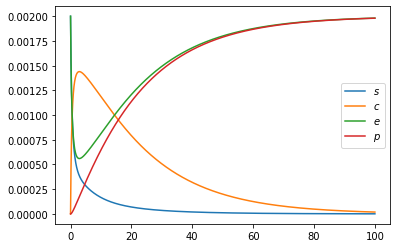

In [ ]:

plt.plot(t_vec, x_vec_t[:, 0])
plt.plot(t_vec, x_vec_t[:, 1])
plt.plot(t_vec, x_vec_t[:, 2])
plt.plot(t_vec, x_vec_t[:, 3])
plt.legend(["$s$","$c$","$e$","$p$" ])

Now with mass action law:


In [ ]:
def deriv_MAL(y, t_vec, k1, k2, k3, e0):
  s, c, p = y  
  ds = (k2 + k1*s)*c - k1*e0*s
  dc = k1*e0*s - (k3 + k2 + k1*s)*c
  dp = k3*c

  return [ds, dc, dp]

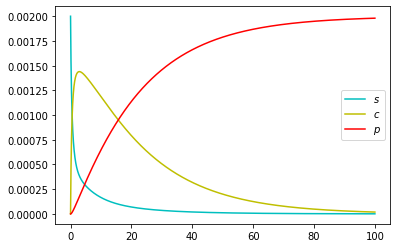

In [ ]:
y0 = [s0, c0, p0]

x_vec_MAL_t = odeint(deriv_MAL, y0, t_vec, args=(k1, k2, k3, e0))

plt.plot(t_vec, x_vec_MAL_t[:, 0], "c-")
plt.plot(t_vec, x_vec_MAL_t[:, 1], "y-")
plt.plot(t_vec, x_vec_MAL_t[:, 2], "r-")

plt.legend(["$s$","$c$","$p$"])

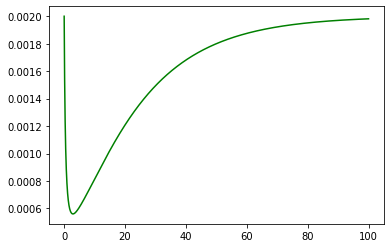

In [ ]:
e_vec = s0 + e0 - (x_vec_MAL_t[:, 0] + 2*x_vec_MAL_t[:, 1] + x_vec_MAL_t[:, 2])
plt.plot(t_vec, e_vec, "g-")


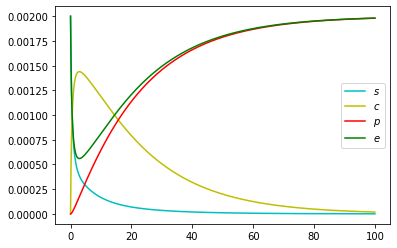

In [ ]:
x_vec_MAL_t = odeint(deriv_MAL, y0, t_vec, args=(k1, k2, k3, e0))

plt.plot(t_vec, x_vec_MAL_t[:, 0], "c-")
plt.plot(t_vec, x_vec_MAL_t[:, 1], "y-")
plt.plot(t_vec, x_vec_MAL_t[:, 2], "r-")
plt.plot(t_vec, e_vec, "g-")

plt.legend(["$s$","$c$","$p$", "$e$"])

We have checked mass action.



# Quasi-state approximation:

 Michaelis-Menten approximation where we consider that the concentration of the complex doesn't change through time:

 $\frac{dc}{dt}=0,  c_{eq} = \frac{k_1  e_0  s}{ k_3 + k_2 +  k_1s} $




In [ ]:
def deriv_quasi(y, t_vec, k1, k2, k3, e0):
  s, p = y
  c_eq = (k1 * e0 * s)/( k3 + k2 +  k1*s)  
  ds = (k2 + k1*s)*c_eq - k1*e0*s
  dc = k1*e0*s - (k3 + k2 + k1*s)*c_eq
  dp = k3*c_eq

  return [ds, dp]

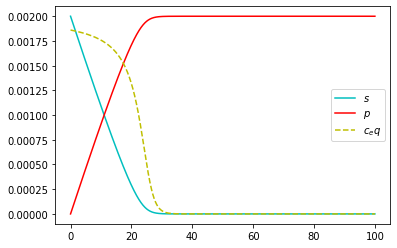

In [ ]:
y0 = [s0, p0]

x_vec_quasi_t = odeint(deriv_quasi, y0, t_vec, args=(k1, k2, k3, e0))

plt.plot(t_vec, x_vec_quasi_t[:, 0], "c-")
plt.plot(t_vec, x_vec_quasi_t[:, 1], "r-")


c_eq_vec = (k1 * e0 * x_vec_quasi_t[:, 0])/( k3 + k2 +  k1*x_vec_quasi_t[:, 0]) 
plt.plot(t_vec, c_eq_vec, "y--")

plt.legend(["$s$","$p$","$c_eq$"])

It works more or less. Let's compare:

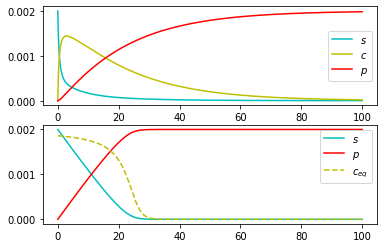

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1)


ax1.plot(t_vec, x_vec_MAL_t[:, 0], "c-")
ax1.plot(t_vec, x_vec_MAL_t[:, 1], "y-")
ax1.plot(t_vec, x_vec_MAL_t[:, 2], "r-")

ax1.legend(["$s$","$c$","$p$"])


ax2.plot(t_vec, x_vec_quasi_t[:, 0], "c-")
ax2.plot(t_vec, x_vec_quasi_t[:, 1], "r-")


c_eq_vec = (k1 * e0 * x_vec_quasi_t[:, 0])/( k3 + k2 +  k1*x_vec_quasi_t[:, 0]) 
ax2.plot(t_vec, c_eq_vec, "y--")

ax2.legend(["$s$","$p$","$c_{eq}$"])

Let's change the $e_0$ parameter:

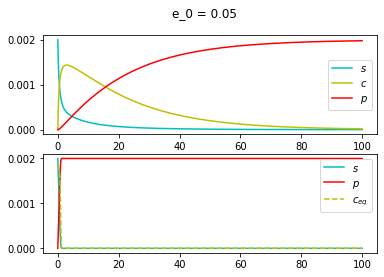

In [ ]:
y0 = [s0, p0]

x_vec_quasi_t = odeint(deriv_quasi, y0, t_vec, args=(k1, k2, k3, 0.05))

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle("e_0 = 0.05")

ax1.plot(t_vec, x_vec_MAL_t[:, 0], "c-")
ax1.plot(t_vec, x_vec_MAL_t[:, 1], "y-")
ax1.plot(t_vec, x_vec_MAL_t[:, 2], "r-")

ax1.legend(["$s$","$c$","$p$"])


ax2.plot(t_vec, x_vec_quasi_t[:, 0], "c-")
ax2.plot(t_vec, x_vec_quasi_t[:, 1], "r-")


c_eq_vec = (k1 * e0 * x_vec_quasi_t[:, 0])/( k3 + k2 +  k1*x_vec_quasi_t[:, 0]) 
ax2.plot(t_vec, c_eq_vec, "y--")

ax2.legend(["$s$","$p$","$c_{eq}$"])

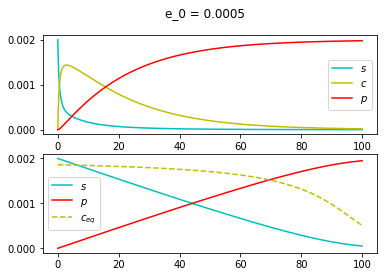

In [ ]:
y0 = [s0, p0]

x_vec_quasi_t = odeint(deriv_quasi, y0, t_vec, args=(k1, k2, k3, 0.0005))

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle("e_0 = 0.0005")

ax1.plot(t_vec, x_vec_MAL_t[:, 0], "c-")
ax1.plot(t_vec, x_vec_MAL_t[:, 1], "y-")
ax1.plot(t_vec, x_vec_MAL_t[:, 2], "r-")

ax1.legend(["$s$","$c$","$p$"])


ax2.plot(t_vec, x_vec_quasi_t[:, 0], "c-")
ax2.plot(t_vec, x_vec_quasi_t[:, 1], "r-")


c_eq_vec = (k1 * e0 * x_vec_quasi_t[:, 0])/( k3 + k2 +  k1*x_vec_quasi_t[:, 0]) 
ax2.plot(t_vec, c_eq_vec, "y--")

ax2.legend(["$s$","$p$","$c_{eq}$"])

When we increase $e_0$ the approximation fails, instead of being a smooth change it becomes sharps and thus the derivative is very high. The assumption of low derivative falls appart and it fails. 

# Código:

Ahora perdemos y ganamos sustrato. 


In [ ]:
t_vec = np.linspace(0,100, 10000)

k1 = 1000
k2 = 0.1
k3 = 0.05 
k4 = 10**(-4)
k5 = 10**(-4)
e0 = 0.002
s0 = 0.002
c0 = 0
p0 = 0

In [ ]:
def deriv_enzime_loss(y, t_vec, k1, k2, k3, k4, k5):
  x1, x2, x3, x4 = y  
  dx1 = k2*x2-k1*x3*x1 -k4*x1 + k5
  dx2 = k1*x3*x1 - (k2 + k3)*x2
  dx3 = (k2 + k3)*x2 - k1*x3*x1
  dx4 = k3*x2
  return [dx1, dx2, dx3, dx4]

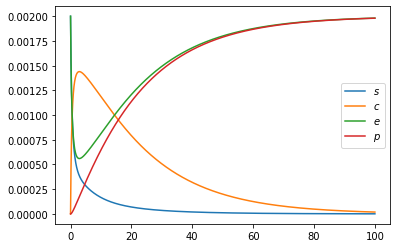

In [ ]:
y0 = [s0, c0, e0, p0]

x_vec_loss_t = odeint(deriv_enzime, y0, t_vec, args=(k1, k2, k3))

plt.plot(t_vec, x_vec_loss_t[:, 0])
plt.plot(t_vec, x_vec_loss_t[:, 1])
plt.plot(t_vec, x_vec_loss_t[:, 2])
plt.plot(t_vec, x_vec_loss_t[:, 3])
plt.legend(["$s$","$c$","$e$","$p$" ])

In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Clase_5.ipynb')

File ‘colab_pdf.py’ already there; not retrieving.





[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Clase_5.ipynb to pdf
[NbConvertApp] Support files will be in Clase_5_files/
[NbConvertApp] Making directory ./Clase_5_files
[NbConvertApp] Making directory ./Clase_5_files
[NbConvertApp] Making directory ./Clase_5_files
[NbConvertApp] Making directory ./Clase_5_files
[NbConvertApp] Making directory ./Clase_5_files
[NbConvertApp] Making directory ./Clase_5_files
[NbConvertApp] Making directory ./Clase_5_files
[NbConvertApp] Making directory ./Clase_5_files
[NbConvertApp] Making directory ./Clase_5_files
[NbConvertApp] Writing 82736 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet']
[NbConvertApp] CRITICAL | xelatex failed: ['xelatex', './notebook.tex', '-quiet']
This is XeTeX, Version 3.14159265-2.6-0.99998 (TeX Live 2017/Debian) (preloaded format=xelatex)
 restricted \write18 en

'File Download Unsuccessful. Saved in Google Drive'

In [9]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('clase_5.ipynb')

File ‘colab_pdf.py’ already there; not retrieving.





[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/clase_5.ipynb to pdf
[NbConvertApp] Support files will be in clase_5_files/
[NbConvertApp] Making directory ./clase_5_files
[NbConvertApp] Making directory ./clase_5_files
[NbConvertApp] Making directory ./clase_5_files
[NbConvertApp] Making directory ./clase_5_files
[NbConvertApp] Making directory ./clase_5_files
[NbConvertApp] Making directory ./clase_5_files
[NbConvertApp] Making directory ./clase_5_files
[NbConvertApp] Making directory ./clase_5_files
[NbConvertApp] Making directory ./clase_5_files
[NbConvertApp] Writing 83054 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet']
[NbConvertApp] CRITICAL | xelatex failed: ['xelatex', './notebook.tex', '-quiet']
This is XeTeX, Version 3.14159265-2.6-0.99998 (TeX Live 2017/Debian) (preloaded format=xelatex)
 restricted \write18 en

'File Download Unsuccessful. Saved in Google Drive'

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
!jupyter nbconvert --to PDF "clase_5.ipynb"


[NbConvertApp] WARNING | pattern 'clase_5.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Exe